Use the train and test set here. [DATASET](https://www.kaggle.com/competitions/titanic/data?select=test.csv)

A few notes to consider:

1. The train set has the target variable.
2. The test set does not include the target variable.

Perform a full machine learning process with random forest classifier. Tune these parameters. Try both with grid search and random search.

* 'n_estimators': [50, 100, 200],
* 'max_depth': [None, 10, 20, 30],
* 'min_samples_leaf': [1, 2, 4]


<h1 align="center">Titanic Survival Prediction</h1>

<h4 align="center">Domain: Predictive Modeling</h4>


**Dataset Name**: Titanic - Machine Learning from Disaster

**Description**: The Titanic dataset contains passenger information from the ill-fated RMS Titanic, which sank on its maiden voyage in 1912. The dataset includes details such as passenger age, sex, fare, class, and embarkation point. The goal of this project is to predict survival outcomes based on these features. The dataset is used to build predictive models to understand which factors significantly influence survival chances and to evaluate model performance using various machine learning techniques.

**Source**: The dataset is sourced from Kaggle [link](https://www.kaggle.com/competitions/titanic/data?select=test.csv)


**Objective**: The objective of this analysis is to develop and evaluate machine learning models to predict passenger survival on the Titanic. By employing techniques like Random Forest Classifier with hyperparameter tuning, the project aims to achieve accurate predictions and gain insights into the key factors affecting survival rates. This can provide valuable information for understanding historical data and improving predictive modeling techniques.


##Column Explanation

| Column         | Explanation                                                                                 |
|----------------|---------------------------------------------------------------------------------------------|
| **PassengerId**| Unique identifier for each passenger. This column is usually dropped for model training.   |
| **Pclass**     | Passenger class (1st, 2nd, or 3rd) representing socio-economic status.                      |
| **Name**       | Name of the passenger. This column is often dropped or used for feature engineering.         |
| **Sex**        | Gender of the passenger (male or female).                                                    |
| **Age**        | Age of the passenger in years. Missing values are typically imputed.                        |
| **SibSp**      | Number of siblings or spouses aboard the Titanic.                                          |
| **Parch**      | Number of parents or children aboard the Titanic.                                           |
| **Ticket**     | Ticket number. This column is usually dropped for model training.                           |
| **Fare**       | Amount of money the passenger paid for the ticket.                                           |
| **Cabin**      | Cabin number where the passenger stayed. This column often has many missing values.          |
| **Embarked**   | Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).                        |
| **Survived**   | Target variable indicating if the passenger survived (1) or not (0).                         |


##Visual Inspection of Datasets

In [132]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Load the train dataset
train_df = pd.read_csv('train_titanic.csv')

train_df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [133]:
# Load the test dataset
test_df = pd.read_csv('test_titanic.csv')

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [134]:
# Load the gender dataset
gender_df = pd.read_csv('gender_titanic.csv')

gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


##Exploratory Data Analysis (EDA)

Train Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

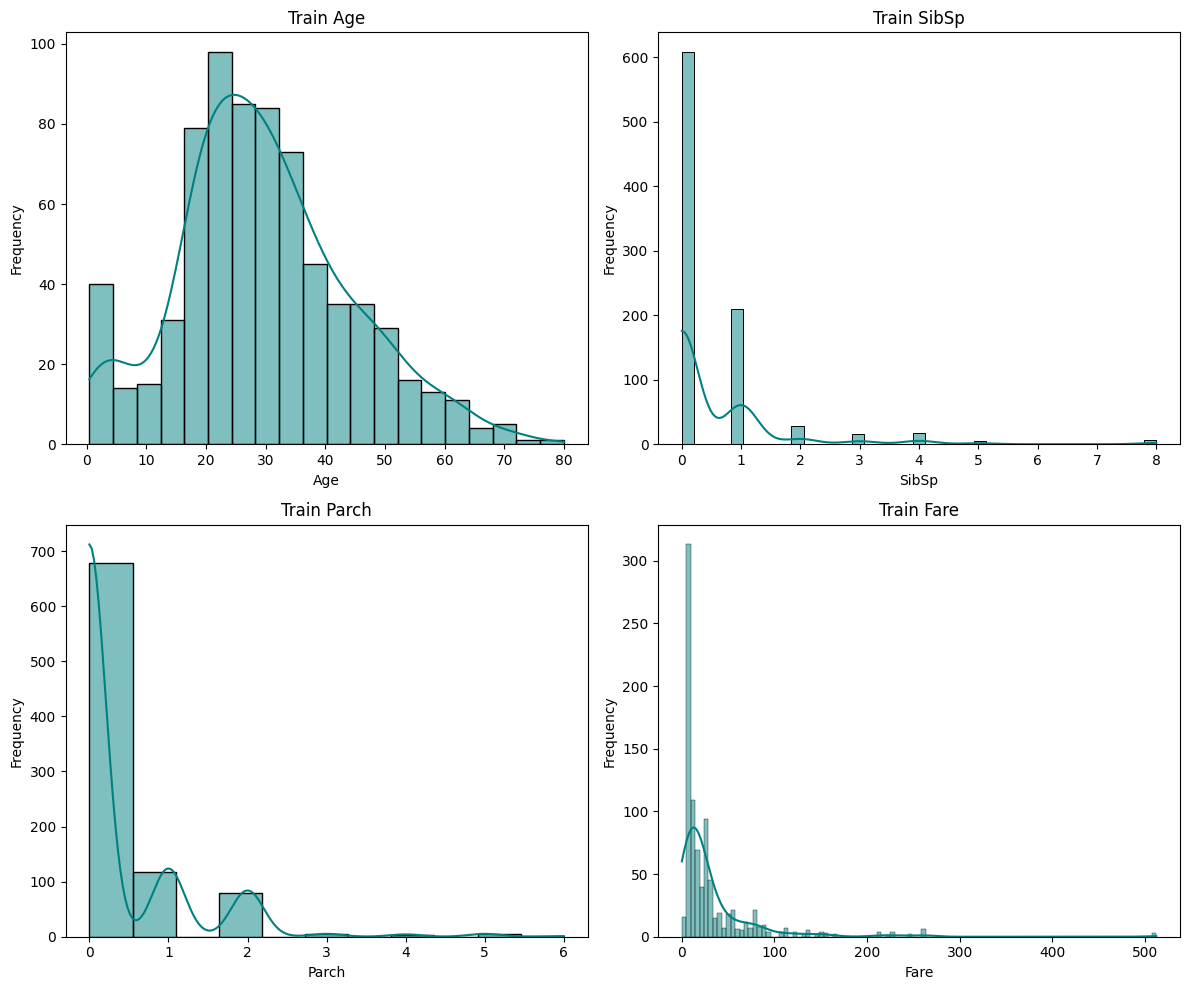

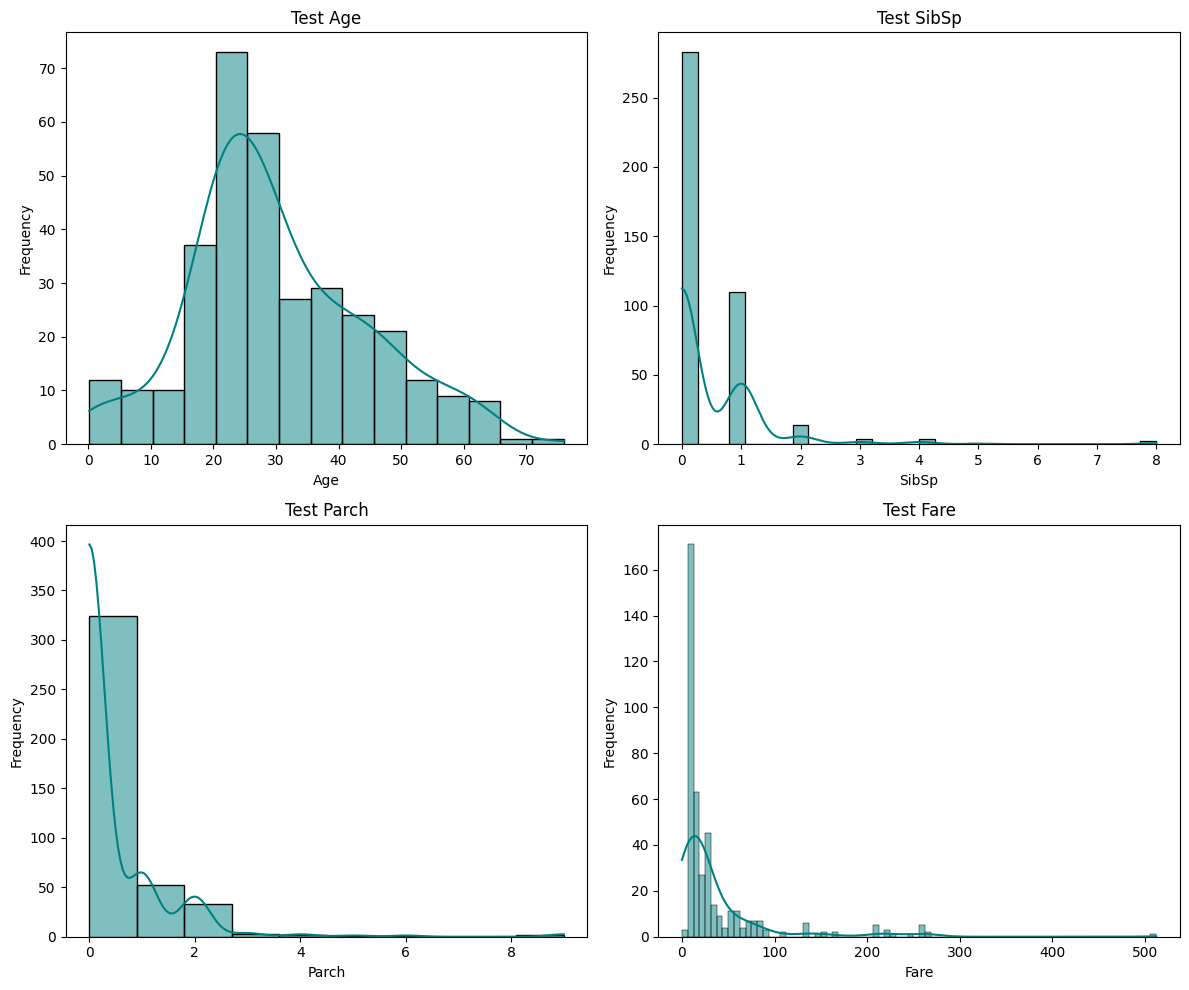


Correlation Summary for Train DataFrame:
Correlation Summaries:
Age and Pclass: Moderate correlation (-0.3692)
Fare and Pclass: Moderate correlation (-0.5495)
SibSp and Age: Moderate correlation (-0.3082)
Parch and SibSp: Moderate correlation (0.4148)


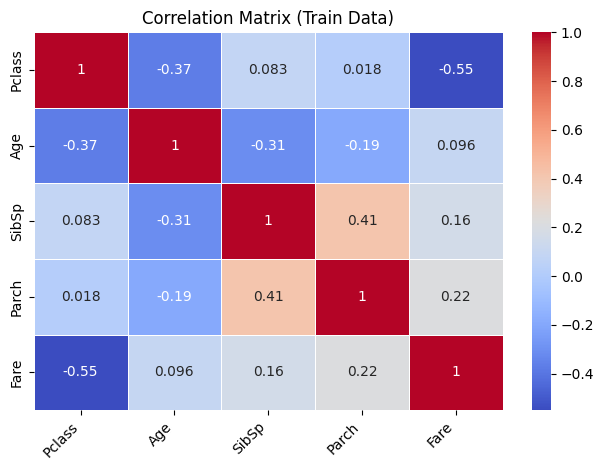


Correlation Summary for Test DataFrame:
Correlation Summaries:
Age and Pclass: Moderate correlation (-0.4921)
Fare and Pclass: Moderate correlation (-0.5771)
Fare and Age: Moderate correlation (0.3379)
Parch and SibSp: Moderate correlation (0.3069)


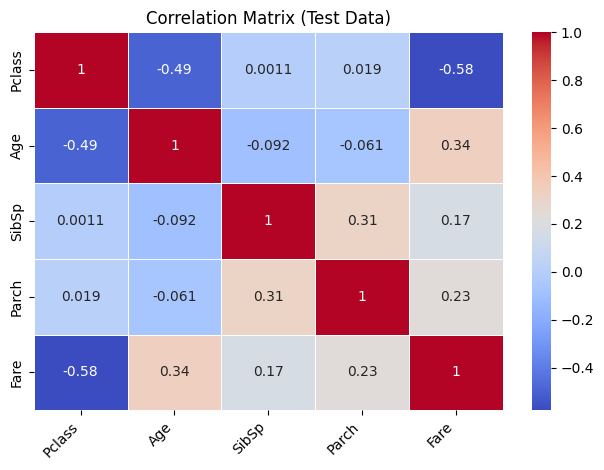


Variance of Numerical Columns in Train DataFrame:
Pclass       0.699015
Age        211.019125
SibSp        1.216043
Parch        0.649728
Fare      2469.436846
dtype: float64

Variance of Numerical Columns in Test DataFrame:
Pclass       0.708690
Age        201.106695
SibSp        0.804178
Parch        0.963203
Fare      3125.657074
dtype: float64

Gender DataFrame Preview:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Gender DataFrame Statistics:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


In [135]:
# Load the datasets
train_df = pd.read_csv('train_titanic.csv')
test_df = pd.read_csv('test_titanic.csv')
gender_df = pd.read_csv('gender_titanic.csv')

# 1. Data Overview
print("Train Data Overview:")
print(train_df.info())
print("\nTest Data Overview:")
print(test_df.info())
print("\nGender Data Overview:")
print(gender_df.info())

# 2. Missing Values
print("\nMissing Values in Train DataFrame:")
print(train_df.isnull().sum())
print("\nMissing Values in Test DataFrame:")
print(test_df.isnull().sum())
print("\nMissing Values in Gender DataFrame:")
print(gender_df.isnull().sum())

# 3. Check for Duplicates
print("\nDuplicates in Train DataFrame:")
print(train_df[train_df.duplicated()])
print("\nDuplicates in Test DataFrame:")
print(test_df[test_df.duplicated()])
print("\nDuplicates in Gender DataFrame:")
print(gender_df[gender_df.duplicated()])

# 4. Unique Values and Value Counts
print("\nUnique Values in Train DataFrame:")
for col in ['Sex', 'Embarked']:
    print(f"{col}: {train_df[col].unique()}")
print("\nUnique Values in Test DataFrame:")
for col in ['Sex', 'Embarked']:
    print(f"{col}: {test_df[col].unique()}")
print("\nUnique Values in Gender DataFrame:")
for col in ['Survived']:
    print(f"{col}: {gender_df[col].unique()}")

print("\nValue Counts for Sex in Train DataFrame:")
print(train_df['Sex'].value_counts())
print("\nValue Counts for Embarked in Train DataFrame:")
print(train_df['Embarked'].value_counts())
print("\nValue Counts for Sex in Test DataFrame:")
print(test_df['Sex'].value_counts())
print("\nValue Counts for Embarked in Test DataFrame:")
print(test_df['Embarked'].value_counts())
print("\nValue Counts for Survived in Gender DataFrame:")
print(gender_df['Survived'].value_counts())

# 5. Descriptive Statistics
print("\nDescriptive Statistics for Train DataFrame:")
print(train_df.describe())
print("\nDescriptive Statistics for Test DataFrame:")
print(test_df.describe())

# 6. Outlier Detection
print("\nOutliers in Train DataFrame:")
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_df[(train_df[col] < (Q1 - 1.5 * IQR)) | (train_df[col] > (Q3 + 1.5 * IQR))]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers.")
print("\nOutliers in Test DataFrame:")
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = test_df[(test_df[col] < (Q1 - 1.5 * IQR)) | (test_df[col] > (Q3 + 1.5 * IQR))]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers.")

# 7. Histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(['Age', 'SibSp', 'Parch', 'Fare']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_df[col], kde=True, color='teal')
    plt.title(f'Train {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(['Age', 'SibSp', 'Parch', 'Fare']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(test_df[col], kde=True, color='teal')
    plt.title(f'Test {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 8. Correlation Matrix
corr_matrix_train = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print("\nCorrelation Summary for Train DataFrame:")
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:
                pair = tuple(sorted([row, col]))
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]
                    if abs(correlation) >= 0.6:
                        print(f"{row} and {col}: High correlation ({correlation:.4f})")
                    elif abs(correlation) >= 0.3:
                        print(f"{row} and {col}: Moderate correlation ({correlation:.4f})")

summarize_correlations(corr_matrix_train)
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Train Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

corr_matrix_test = test_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print("\nCorrelation Summary for Test DataFrame:")
summarize_correlations(corr_matrix_test)
sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Test Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 9. Variance
print("\nVariance of Numerical Columns in Train DataFrame:")
print(train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].var())
print("\nVariance of Numerical Columns in Test DataFrame:")
print(test_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].var())

# 10. Additional Checks for Gender DataFrame
print("\nGender DataFrame Preview:")
print(gender_df.head())
print("\nGender DataFrame Statistics:")
print(gender_df.describe())


**Data Overview**

Train 12 columns. 891 rows<br>
Test 11 columns, 418 rows<br>
Gender 2 columns, 418 rows

Missing Values:

Train
  - Age 177 (~20%)
  - Cabin 687 (~77%)
  - Embarked 2 (less than 1%)

Test
  - Age 86 (~21%)
  - Fare 1 (less than %)
  - Cabin 327 missing (~78%)

We will consider imputing missing values with median or mean for Age and Fare, and consider dropping the Cabin feature as there is so much that is missing. Embarked we can impute missing values or drop rows with those missing values.

**Unique Values**

Train
- Sex:
  - male 577
  - female 314
- Embarked
  - S 644
  - C 168
  - Q 77

We will need to encode Sex as female=0 male=1 and Embarked as a conversion of ['Q' 'S' 'C'] to numeric.

**Correlations**

Moderate negative correlation:
- Age and Pclass (-0.3692) Older passengers tend to be in higher classes
- Fare and Pclass (-0.5771) Higher classes are associated with higher fares

Moderate positive correlation:
- Far and Age (.3379) Older passengers tend to have higher fares
- Parch and SibSp (.3069) Families with more siblings or spouses on board tend to have more parents or children

We will need to use correlations to inform feature selection.

**Outliers**

Train
  - Age: 11 outliers
  - SibSp: 46 outliers
  - Parch: 213 outliers
  - Fare: 116 outliers

Test
  - Age: 2 outliers
  - SibSp: 11 outliers
  - Parch: 94 outliers
  - Fare: 55 outliers

With only 11 outliers in Age, we will keep them. For SibSp, these could indicate families with a large number of siblings (rarely multiple spouses) and it could be that it's possible that large families travelled together. If they are not causing issues in the model we will keep them or cap them. Parch outliers of 213 could reflect large family groups, not uncommon, and we will consider keeping these. Fare at 116 could be representative of luxury accommodations and we will consider capping these as well.



####Handle missing values and drop columns including Cabin, Name and Ticket (the ticket number)

In [136]:
from sklearn.impute import SimpleImputer

# Drop columns 'Cabin', 'Name', and 'Ticket'
train_df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
test_df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# Impute missing values for 'Age' and 'Fare'
# Instantiate the imputer
age_imputer = SimpleImputer(strategy='median')
fare_imputer = SimpleImputer(strategy='median')

# Impute missing values in Train DataFrame
train_df['Age'] = age_imputer.fit_transform(train_df[['Age']])
train_df['Fare'] = fare_imputer.fit_transform(train_df[['Fare']])

# Impute missing values in Test DataFrame
test_df['Age'] = age_imputer.transform(test_df[['Age']])
test_df['Fare'] = fare_imputer.transform(test_df[['Fare']])

# Print the number of missing values to verify
print("Missing values in Train DataFrame:")
print(train_df.isnull().sum())
print("\nMissing values in Test DataFrame:")
print(test_df.isnull().sum())


Missing values in Train DataFrame:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

Missing values in Test DataFrame:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [137]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [138]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,28.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,28.0,0,0,8.0500,S


In [139]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


####Use LabelEncoder for Sex, Embarked

In [140]:
# Instantiate LabelEncoders
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

# Fit and transform 'Sex' column for both train and test
sex_encoder.fit(train_df['Sex'])
train_df['Sex'] = sex_encoder.transform(train_df['Sex'])
test_df['Sex'] = sex_encoder.transform(test_df['Sex'])

# Fit and transform 'Embarked' column for both train and test
embarked_encoder.fit(train_df['Embarked'].dropna())  # Drop missing values for fitting
train_df['Embarked'] = embarked_encoder.transform(train_df['Embarked'].fillna(embarked_encoder.classes_[0]))
test_df['Embarked'] = embarked_encoder.transform(test_df['Embarked'].fillna(embarked_encoder.classes_[0]))

# Print out mappings
print("Sex encoding:")
for label, encoding in zip(sex_encoder.classes_, sex_encoder.transform(sex_encoder.classes_)):
    print(f"{label} = {encoding}")

print("\nEmbarked encoding:")
for label, encoding in zip(embarked_encoder.classes_, embarked_encoder.transform(embarked_encoder.classes_)):
    print(f"{label} = {encoding}")

# Verify encoding
print("\nEncoded Train DataFrame:")
print(train_df.head())

print("\nEncoded Test DataFrame:")
print(test_df.head())


Sex encoding:
female = 0
male = 1

Embarked encoding:
C = 0
Q = 1
S = 2

Encoded Train DataFrame:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2

Encoded Test DataFrame:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    1  34.5      0      0   7.8292         1
1          893       3    0  47.0      1      0   7.0000         2
2          894       2    1  62.0      0      0   9.6875         1
3          895       3    1  27.0      0      0   8.6625         2
4          896       3    0  22.0      1      1  12.2875         2


Sex encoding mapping:<br>
female is encoded as 0<br>
male is encoded as 1<br>

Embarked encoding mapping:<br>
C is encoded as 0<br>
Q is encoded as 1<br>
S is encoded as 2<br>

####Address Outliers

In [142]:
# Define caps for each feature
age_cap_upper = None
sibsp_cap_upper = 8
parch_cap_upper = 6
fare_cap_upper = 150

# Cap outliers in the train dataset
train_df['Age'] = train_df['Age'].clip(upper=age_cap_upper)
train_df['SibSp'] = train_df['SibSp'].clip(upper=sibsp_cap_upper)
train_df['Parch'] = train_df['Parch'].clip(upper=parch_cap_upper)
train_df['Fare'] = train_df['Fare'].clip(upper=fare_cap_upper)

# Cap outliers in the test dataset
test_df['Age'] = test_df['Age'].clip(upper=age_cap_upper)
test_df['SibSp'] = test_df['SibSp'].clip(upper=sibsp_cap_upper)
test_df['Parch'] = test_df['Parch'].clip(upper=parch_cap_upper)
test_df['Fare'] = test_df['Fare'].clip(upper=fare_cap_upper)

# Verify capping
print("Train DataFrame capped values:")
print(train_df[['Age', 'SibSp', 'Parch', 'Fare']].describe())

print("Test DataFrame capped values:")
print(test_df[['Age', 'SibSp', 'Parch', 'Fare']].describe())


Train DataFrame capped values:
              Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582    0.499439    0.373737   27.027169
std     13.019697    0.966140    0.763306   27.296632
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     35.000000    1.000000    0.000000   31.000000
max     80.000000    5.000000    4.000000  100.000000
Test DataFrame capped values:
              Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000
mean    29.805024    0.433014    0.361244   27.788746
std     12.667969    0.793596    0.778075   28.248266
min      0.170000    0.000000    0.000000    0.000000
25%     23.000000    0.000000    0.000000    7.895800
50%     28.000000    0.000000    0.000000   14.454200
75%     35.750000    1.000000    0.000000   31.471875
max     76.000000    

Capping Summary:

Train:
- Age is now from .42-80 years, most between 22-35 years old.
- SibSp 0-5 siblings/spouses but most are near 0.
- Parch is at 0-4, but majority have 0 parents/children on board.
- Fare ranges from 0-100 with most fare between 7.91 and 31.

Test:
- Age is now from 0.17-76 years, most betwween 23-35.75 years old.
- SibSp 0-5 siblings/spuoses but most are near 0.
- Parch is at 0-4 with the majority haveing 0 parents/children on board.
- Fare ranges from 0-100 with nost between 7.90 and 31.47


In [143]:
# Print information for each DataFrame
print("Train DataFrame Info:")
print(train_df.info())
print("\nTest DataFrame Info:")
print(test_df.info())
print("\nGender DataFrame Info:")
print(gender_df.info())

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
None

Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          41

##Feature Selection

In [144]:
# Define features and target variable
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
2          Sex    0.254092
0  PassengerId    0.197135
6         Fare    0.188841
3          Age    0.173823
1       Pclass    0.083405
4        SibSp    0.039003
5        Parch    0.031934
7     Embarked    0.031768


We will exclude PassengerID (not useful for prediction), SibSp, Parch, and Embarked as they are of lower importance. We will include those of high and moderate importance: Sex, Fare, Age, Pclass.

##Data Preparation

In [221]:
# Select important features for both train and test data
features = ['Sex', 'Fare', 'Age', 'Pclass']

# Features
features = ['Sex', 'Fare', 'Age', 'Pclass']

# Prepare the training data
X_train = train_df[features]
y_train = train_df['Survived']

# Prepare the test data, ensuring it only includes the same features
X_test = test_df[features]

# Verify the shapes of the datasets
print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Test features shape:", X_test.shape)

# Fit the model with training data
rf.fit(X_train, y_train)

# Predict on the test set
try:
    y_test_pred = rf.predict(X_test)
    print("Predictions successfully made.")
except ValueError as e:
    print(f"Error making predictions: {e}")


Training features shape: (891, 4)
Training target shape: (891,)
Test features shape: (418, 4)
Predictions successfully made.


##Algorithm

In [222]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to evaluate the model
def evaluate_model(X, y, test_size, random_state=42):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Calculate metrics
    metrics = {
        "Train - Accuracy": accuracy_score(y_train, y_train_pred),
        "Train - Precision": precision_score(y_train, y_train_pred),
        "Train - Recall": recall_score(y_train, y_train_pred),
        "Train - F1 Score": f1_score(y_train, y_train_pred),
        "Test - Accuracy": accuracy_score(y_test, y_test_pred),
        "Test - Precision": precision_score(y_test, y_test_pred),
        "Test - Recall": recall_score(y_test, y_test_pred),
        "Test - F1 Score": f1_score(y_test, y_test_pred)
    }

    return metrics

# Evaluate with 70/30 split
metrics_70_30 = evaluate_model(X, y, test_size=0.3)
print("Evaluating models with 70/30 split:")
print("-------------------------------")
print(f"Random Forest Classifier:")
print(f"Train - Accuracy: {metrics_70_30['Train - Accuracy']:.4f}, Precision: {metrics_70_30['Train - Precision']:.4f}, Recall: {metrics_70_30['Train - Recall']:.4f}, F1 Score: {metrics_70_30['Train - F1 Score']:.4f}")
print(f"Test  - Accuracy: {metrics_70_30['Test - Accuracy']:.4f}, Precision: {metrics_70_30['Test - Precision']:.4f}, Recall: {metrics_70_30['Test - Recall']:.4f}, F1 Score: {metrics_70_30['Test - F1 Score']:.4f}")

print("\n")

# Evaluate with 80/20 split
metrics_80_20 = evaluate_model(X, y, test_size=0.2)
print("Evaluating models with 80/20 split:")
print("-------------------------------")
print(f"Random Forest Classifier:")
print(f"Train - Accuracy: {metrics_80_20['Train - Accuracy']:.4f}, Precision: {metrics_80_20['Train - Precision']:.4f}, Recall: {metrics_80_20['Train - Recall']:.4f}, F1 Score: {metrics_80_20['Train - F1 Score']:.4f}")
print(f"Test  - Accuracy: {metrics_80_20['Test - Accuracy']:.4f}, Precision: {metrics_80_20['Test - Precision']:.4f}, Recall: {metrics_80_20['Test - Recall']:.4f}, F1 Score: {metrics_80_20['Test - F1 Score']:.4f}")


Evaluating models with 70/30 split:
-------------------------------
Random Forest Classifier:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test  - Accuracy: 0.8134, Precision: 0.8352, Recall: 0.6847, F1 Score: 0.7525


Evaluating models with 80/20 split:
-------------------------------
Random Forest Classifier:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test  - Accuracy: 0.8324, Precision: 0.8143, Recall: 0.7703, F1 Score: 0.7917


##Hyperparameter Tune

In [223]:
# Features and target
features = ['Sex', 'Fare', 'Age', 'Pclass']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_df[features], train_df['Survived'], test_size=0.3, random_state=42
)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters Found:")
print(best_params)
print("Best Cross-Validation Score:")
print(best_score)

# Get the best model from Grid Search
best_rf = grid_search.best_estimator_

# Predict on the test set
y_test_pred = best_rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the results
print("\nEvaluating the Best Random Forest Model:")
print("-------------------------------")
print(f"Test - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters Found:
{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
Best Cross-Validation Score:
0.8234580645161291

Evaluating the Best Random Forest Model:
-------------------------------
Test - Accuracy: 0.8097, Precision: 0.8659, Recall: 0.6396, F1 Score: 0.7358


####Further tuning

In [224]:
def evaluate_model_with_tuning(X, y, test_size, random_state=42):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    }

    # Parameter distribution for RandomizedSearchCV
    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Random Forest model
    rf = RandomForestClassifier(random_state=random_state)

    # GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_rf_grid = grid_search.best_estimator_
    best_params_grid = grid_search.best_params_
    best_score_grid = grid_search.best_score_

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=random_state)
    random_search.fit(X_train, y_train)
    best_rf_random = random_search.best_estimator_
    best_params_random = random_search.best_params_
    best_score_random = random_search.best_score_

    # Predict on training and test sets for Grid Search
    y_train_pred_grid = best_rf_grid.predict(X_train)
    y_test_pred_grid = best_rf_grid.predict(X_test)

    # Predict on training and test sets for Random Search
    y_train_pred_random = best_rf_random.predict(X_train)
    y_test_pred_random = best_rf_random.predict(X_test)

    # Calculate metrics for Grid Search
    metrics_grid = {
        "Train - Accuracy (Grid)": accuracy_score(y_train, y_train_pred_grid),
        "Train - Precision (Grid)": precision_score(y_train, y_train_pred_grid),
        "Train - Recall (Grid)": recall_score(y_train, y_train_pred_grid),
        "Train - F1 Score (Grid)": f1_score(y_train, y_train_pred_grid),
        "Test - Accuracy (Grid)": accuracy_score(y_test, y_test_pred_grid),
        "Test - Precision (Grid)": precision_score(y_test, y_test_pred_grid),
        "Test - Recall (Grid)": recall_score(y_test, y_test_pred_grid),
        "Test - F1 Score (Grid)": f1_score(y_test, y_test_pred_grid)
    }

    # Calculate metrics for Random Search
    metrics_random = {
        "Train - Accuracy (Random)": accuracy_score(y_train, y_train_pred_random),
        "Train - Precision (Random)": precision_score(y_train, y_train_pred_random),
        "Train - Recall (Random)": recall_score(y_train, y_train_pred_random),
        "Train - F1 Score (Random)": f1_score(y_train, y_train_pred_random),
        "Test - Accuracy (Random)": accuracy_score(y_test, y_test_pred_random),
        "Test - Precision (Random)": precision_score(y_test, y_test_pred_random),
        "Test - Recall (Random)": recall_score(y_test, y_test_pred_random),
        "Test - F1 Score (Random)": f1_score(y_test, y_test_pred_random)
    }

    return metrics_grid, best_params_grid, best_score_grid, best_rf_grid, metrics_random, best_params_random, best_score_random, best_rf_random

# Usage with 70/30 split
metrics_70_30, best_params_70_30, best_score_70_30, best_rf_grid_70_30, metrics_random_70_30, best_params_random_70_30, best_score_random_70_30, best_rf_random_70_30 = evaluate_model_with_tuning(X, y, test_size=0.3)

print("Evaluating models with 70/30 split:")
print("-------------------------------")
print("Grid Search Results:")
print(f"Train - Accuracy: {metrics_70_30['Train - Accuracy (Grid)']:.4f}, Precision: {metrics_70_30['Train - Precision (Grid)']:.4f}, Recall: {metrics_70_30['Train - Recall (Grid)']:.4f}, F1 Score: {metrics_70_30['Train - F1 Score (Grid)']:.4f}")
print(f"Test  - Accuracy: {metrics_70_30['Test - Accuracy (Grid)']:.4f}, Precision: {metrics_70_30['Test - Precision (Grid)']:.4f}, Recall: {metrics_70_30['Test - Recall (Grid)']:.4f}, F1 Score: {metrics_70_30['Test - F1 Score (Grid)']:.4f}")
print(f"Best Parameters (Grid): {best_params_70_30}")
print(f"Best Cross-Validation Score (Grid): {best_score_70_30:.4f}")

print("\nRandom Search Results:")
print(f"Train - Accuracy: {metrics_random_70_30['Train - Accuracy (Random)']:.4f}, Precision: {metrics_random_70_30['Train - Precision (Random)']:.4f}, Recall: {metrics_random_70_30['Train - Recall (Random)']:.4f}, F1 Score: {metrics_random_70_30['Train - F1 Score (Random)']:.4f}")
print(f"Test  - Accuracy: {metrics_random_70_30['Test - Accuracy (Random)']:.4f}, Precision: {metrics_random_70_30['Test - Precision (Random)']:.4f}, Recall: {metrics_random_70_30['Test - Recall (Random)']:.4f}, F1 Score: {metrics_random_70_30['Test - F1 Score (Random)']:.4f}")
print(f"Best Parameters (Random): {best_params_random_70_30}")
print(f"Best Cross-Validation Score (Random): {best_score_random_70_30:.4f}")

print("\n")

# Usage with 80/20 split
metrics_80_20, best_params_80_20, best_score_80_20, best_rf_grid_80_20, metrics_random_80_20, best_params_random_80_20, best_score_random_80_20, best_rf_random_80_20 = evaluate_model_with_tuning(X, y, test_size=0.2)

print("Evaluating models with 80/20 split:")
print("-------------------------------")
print("Grid Search Results:")
print(f"Train - Accuracy: {metrics_80_20['Train - Accuracy (Grid)']:.4f}, Precision: {metrics_80_20['Train - Precision (Grid)']:.4f}, Recall: {metrics_80_20['Train - Recall (Grid)']:.4f}, F1 Score: {metrics_80_20['Train - F1 Score (Grid)']:.4f}")
print(f"Test  - Accuracy: {metrics_80_20['Test - Accuracy (Grid)']:.4f}, Precision: {metrics_80_20['Test - Precision (Grid)']:.4f}, Recall: {metrics_80_20['Test - Recall (Grid)']:.4f}, F1 Score: {metrics_80_20['Test - F1 Score (Grid)']:.4f}")
print(f"Best Parameters (Grid): {best_params_80_20}")
print(f"Best Cross-Validation Score (Grid): {best_score_80_20:.4f}")

print("\nRandom Search Results:")
print(f"Train - Accuracy: {metrics_random_80_20['Train - Accuracy (Random)']:.4f}, Precision: {metrics_random_80_20['Train - Precision (Random)']:.4f}, Recall: {metrics_random_80_20['Train - Recall (Random)']:.4f}, F1 Score: {metrics_random_80_20['Train - F1 Score (Random)']:.4f}")
print(f"Test  - Accuracy: {metrics_random_80_20['Test - Accuracy (Random)']:.4f}, Precision: {metrics_random_80_20['Test - Precision (Random)']:.4f}, Recall: {metrics_random_80_20['Test - Recall (Random)']:.4f}, F1 Score: {metrics_random_80_20['Test - F1 Score (Random)']:.4f}")
print(f"Best Parameters (Random): {best_params_random_80_20}")
print(f"Best Cross-Validation Score (Random): {best_score_random_80_20:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Evaluating models with 70/30 split:
-------------------------------
Grid Search Results:
Train - Accuracy: 0.8876, Precision: 0.9259, Recall: 0.7576, F1 Score: 0.8333
Test  - Accuracy: 0.8209, Precision: 0.8621, Recall: 0.6757, F1 Score: 0.7576
Best Parameters (Grid): {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}
Best Cross-Validation Score (Grid): 0.8315

Random Search Results:
Train - Accuracy: 0.8876, Precision: 0.9259, Recall: 0.7576, F1 Score: 0.8333
Test  - Accuracy: 0.8209, Precision: 0.8621, Recall: 0.6757, F1 Score: 0.7576
Best Parameters (Random): {'n_estimators': 200, 'min_samples_leaf': 4, 'max_depth': 10}
Best Cross-Validation Score (Random): 0.8315


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Evaluating models with 80/20 split:
-----------------------------

<table border="1">
  <thead>
    <tr>
      <th colspan="1"></th>
      <th colspan="2">70/30 Grid Search</th>
      <th colspan="2">70/30 Random Search</th>
      <th colspan="2">80/20 Grid Search</th>
      <th colspan="2">80/20 Random Search</th>
    </tr>
    <tr>
      <th>Metric</th>
      <th>Train</th>
      <th>Test</th>
      <th>Train</th>
      <th>Test</th>
      <th>Train</th>
      <th>Test</th>
      <th>Train</th>
      <th>Test</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <td>0.8876</td>
      <td>0.8209</td>
      <td>0.8876</td>
      <td>0.8209</td>
      <td>0.8834</td>
      <td>0.8156</td>
      <td>0.8834</td>
      <td>0.8156</td>
    </tr>
    <tr>
      <td>Precision</td>
      <td>0.9259</td>
      <td>0.8621</td>
      <td>0.9259</td>
      <td>0.8621</td>
      <td>0.9263</td>
      <td>0.8154</td>
      <td>0.9263</td>
      <td>0.8154</td>
    </tr>
    <tr>
      <td>Recall</td>
      <td>0.7576</td>
      <td>0.6757</td>
      <td>0.7576</td>
      <td>0.6757</td>
      <td>0.7500</td>
      <td>0.7162</td>
      <td>0.7500</td>
      <td>0.7162</td>
    </tr>
    <tr>
      <td>F1 Score</td>
      <td>0.8333</td>
      <td>0.7576</td>
      <td>0.8333</td>
      <td>0.7576</td>
      <td>0.8289</td>
      <td>0.7626</td>
      <td>0.8289</td>
      <td>0.7626</td>
    </tr>
  </tbody>
</table>


The best parameters for both searches are similar, indicating consistent results in the tuning. The training and testing data are also similar. The F1 Score for the test data is slightly higher with the 80/20 split compared to the 70/30 split. This suggests a more balanced performance in the 80/20.

##Prediction

Fit the best model

In [227]:
# Fit the best model from Grid Search with the 80/20 split
best_rf_grid_80_20.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=4, n_estimators=200, random_state=42)

Predict using best model

In [228]:
# Predict on the test set using the best model
try:
    y_test_pred = best_rf_grid_80_20.predict(test_df[features])
    print("Predictions successfully made.")
except ValueError as e:
    print(f"Error making predictions: {e}")


Predictions successfully made.


Prepare for submission dataframe

In [229]:
# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test_pred
})

# Print the first few rows to check the structure
print(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


Compare with gender_submission.csv renamed gender_titanic.csv

In [239]:
# Load my submission file
submission_df = pd.read_csv('submission.csv')

# Load the gender_titanic.csv file (which assumes all females survive) aka gender_submission.csv
gender_df = pd.read_csv('gender_titanic.csv')


merge the dataframes

In [240]:
# Merge your submission with the gender_titanic.csv to compare
comparison_df = submission_df.merge(gender_df, on='PassengerId', suffixes=('_my_model', '_theirs'))


In [241]:
comparison_df

,PassengerId,Survived_my_model,Survived_theirs
0,892,0,0
1,893,0,1
2,894,0,0
3,895,0,0
4,896,0,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


Compare accuracy

In [242]:
# Calculate accuracy compared to gender_titanic.csv
accuracy = (comparison_df['Survived_my_model'] == comparison_df['Survived_theirs']).mean()
print(f"Accuracy compared to gender_titanic.csv: {accuracy:.4f}")


Accuracy compared to gender_titanic.csv: 0.8828


Count survivors

In [243]:
# Count of survivors by my model's predictions
count_survived_my_model = comparison_df['Survived_my_model'].value_counts()
print("Survivors count by my model:")
print(count_survived_my_model)

# Count of survivors in the gender_titanic.csv
count_survived_gender = comparison_df['Survived_theirs'].value_counts()
print("\nSurvivors count by gender_titanic.csv:")
print(count_survived_gender)


Survivors count by my model:
Survived_my_model
0    291
1    127
Name: count, dtype: int64

Survivors count by gender_titanic.csv:
Survived_theirs
0    266
1    152
Name: count, dtype: int64


##Summary

The project demonstrated effective use of machine learning to predict Titanic survival outcomes. The Random Forest Classifier, with hyperparameter tuning via Grid Search and Random Search, showed strong performance. The 80/20 split had a more balanced performance across metrics, suggesting it might be preferable for generalization in this dataset. Here, there are no differences in accuracy, precision, recall, or F1 score between the two search methods.

Compared to the gender_submission.csv, the model performs well. Both predict more non-survivors, although mine is slightly lower.

Future work could focus on exploring additional models or advanced feature engineering to further enhance predictive accuracy.